/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


9.800238929972127e-12
9.98716004914732e-13
8.685367557999263e-13
7.497517429172136e-13
8.580110094815054e-13
8.139501025803513e-13
7.662060370089931e-13
9.428530804904528e-13
9.196446479268919e-13
9.633910971434838e-13
1.169322960447358e-12
1.6555434650645408e-12
3.0892760099011028e-12
3.0895313101953096e-12
3.092990532219111e-12
6.619039592316343e-13
7.144209707227398e-13
1.84167705664234e-12


<Figure size 864x576 with 0 Axes>

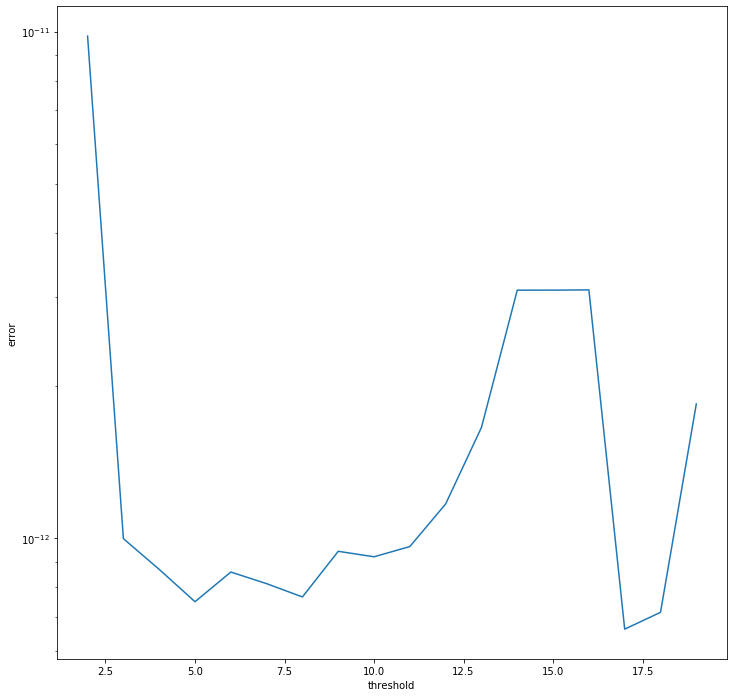

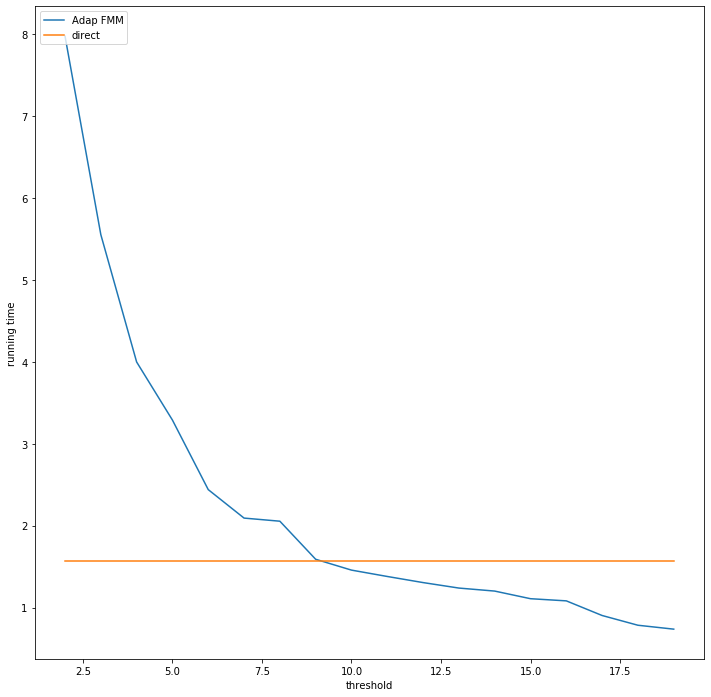

In [34]:
from adapFMM import *
import copy
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import math
n=1000
m=100
P=10


X=[]
Y=[]
for i in range(n):
    # radius of the circle
    circle_r = m/2.0
    # center of the circle (x, y)
    circle_x = m/2.0
    circle_y = m/2.0

    # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    r = circle_r * math.sqrt(random.uniform(0.8,1))
    # calculating coordinates
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    X.append(x)
    Y.append(y)
#particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]

particles=[Particle(x,y,1) for x,y in zip(X,Y)]

particlesCopy1=copy.deepcopy(particles)
starttime=time.clock()
directSource(particlesCopy1)
originalTime=time.clock()-starttime

fig = plt.figure(figsize=(12, 8))
x = [point.x for point in particlesCopy1]
y = [point.y for point in particlesCopy1]

u = [point.u.real for point in particlesCopy1]
errorlist=[]
timelist=[]
for thresh in range(2,20):
    particlesCopy2=copy.deepcopy(particles)
    starttime=time.clock()
    qt=AdapQTree(thresh,particlesCopy2,m)
    #qt.graph()
    
    setAllZero(qt.root,P)
    outgoingExpansion(qt.root,P)
    incomingExpansionAdap(qt.root,P)
    summation(qt.root,P)
    timelist.append(time.clock()-starttime)
    u1 = [point.u.real for point in particlesCopy2]
    error=0
    base=0
    for i in range(len(u)):
        error+=(u[i]-u1[i])**2
        base+=u[i]**2
        #print(x[i],y[i],u[i],u1[i])
    errorlist.append(error/base)
    print(error/base)

    
#print(errorList)
glist=list(range(2,20))
fig = plt.figure(figsize=(12, 12))
plt.plot(glist, errorlist)
plt.yscale('log')
plt.xlabel('threshold')
plt.ylabel('error')
plt.show()

#print(FmmTimeList)
glist=list(range(2,20))
fig = plt.figure(figsize=(12, 12))
plt.plot(glist, timelist,label='Adap FMM')
plt.plot(glist,[originalTime]*len(glist),label='direct')
plt.legend(loc="upper left")
plt.xlabel('threshold')
plt.ylabel('running time')

plt.show()

/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipyk

0.0048369999985879986
0.03500799999892479
1.626690058453072e-14
0.043965999999272753
0.1400740000008227
3.261658503505119e-14
0.19453700000121898
0.48067600000103994
5.090477894317678e-14
1.2129049999985
1.303074999999808
3.0873907336311647e-12
5.498006999998324
3.073119000000588
8.54283003261904e-14
22.56326099999933
6.4417929999999615
5.284169028461915e-13
115.74455599999965
20.27686100000028
1.6134698261011061e-12
603.1957150000017
35.53479800000059
1.6274812845928662e-12


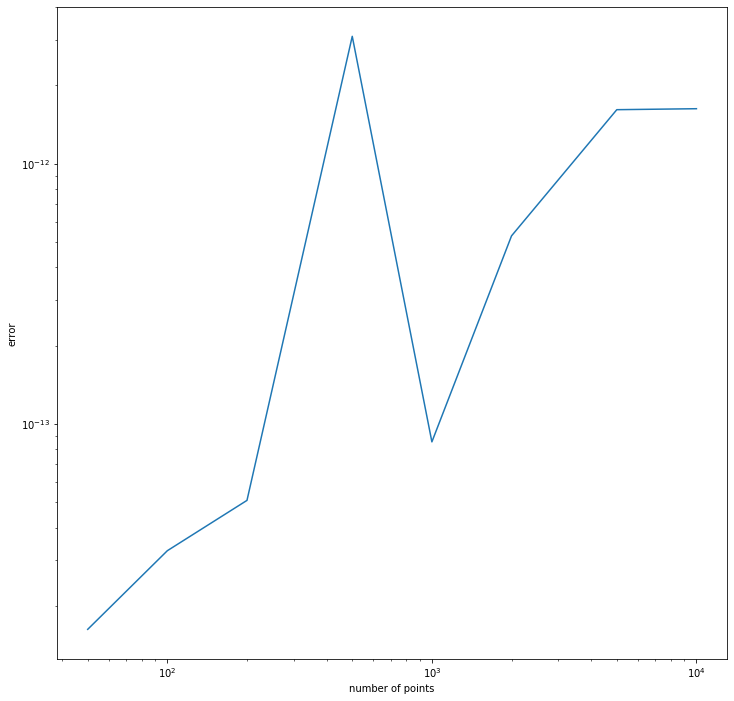

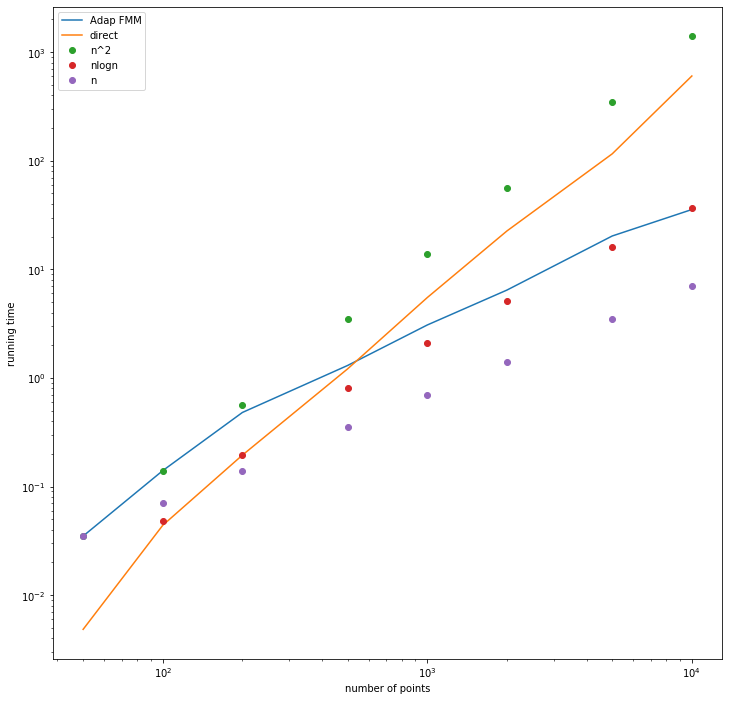

In [35]:
n=1000
m=100
P=10


X=[]
Y=[]
errorlist=[]
timelist=[]
originalTimelist=[]
glist=[50,100,200,500,1000,2000,5000,10000]#,20000,50000]
for n in glist:
    # radius of the circle
    for i in range(n):
        circle_r = m/2.0
        # center of the circle (x, y)
        circle_x = m/2.0
        circle_y = m/2.0

        # random angle
        alpha = 2 * math.pi * random.random()
        # random radius
        r = circle_r * math.sqrt(random.uniform(0.8,1))
        # calculating coordinates
        x = r * math.cos(alpha) + circle_x
        y = r * math.sin(alpha) + circle_y
        X.append(x)
        Y.append(y)
        #particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]

    particles=[Particle(x,y,1) for x,y in zip(X,Y)]

    particlesCopy1=copy.deepcopy(particles)
    starttime=time.clock()
    directSource(particlesCopy1)
    originalTime=time.clock()-starttime
    originalTimelist.append(originalTime)
    print(originalTime)

    
    x = [point.x for point in particlesCopy1]
    y = [point.y for point in particlesCopy1]

    u = [point.u.real for point in particlesCopy1]
    


    particlesCopy2=copy.deepcopy(particles)
    starttime=time.clock()
    qt=AdapQTree(10,particlesCopy2,m)
    #qt.graph()
    
    setAllZero(qt.root,P)
    outgoingExpansion(qt.root,P)
    incomingExpansionAdap(qt.root,P)
    summation(qt.root,P)
    timelist.append(time.clock()-starttime)
    print(time.clock()-starttime)
    u1 = [point.u.real for point in particlesCopy2]
    error=0
    base=0
    for i in range(len(u)):
        error+=(u[i]-u1[i])**2
        base+=u[i]**2
        #print(x[i],y[i],u[i],u1[i])
    errorlist.append(error/base)
    print(error/base)

    
#print(errorList)
fig = plt.figure(figsize=(12, 12))
plt.plot(glist, errorlist)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('number of points')
plt.ylabel('error')
plt.show()

sizen=[n/glist[0] for n in glist]
nsquare=[timelist[0]*s*s for s in sizen]
nlogn=[timelist[0]*s*np.log(s) for s in sizen]
n=[timelist[0]*s for s in sizen]



#print(FmmTimeList)
fig = plt.figure(figsize=(12, 12))
plt.plot(glist, timelist,label='Adap FMM')
plt.plot(glist,originalTimelist,label='direct')
plt.plot(glist,nsquare,'o',label='n^2')
plt.plot(glist,nlogn,'o',label='nlogn')
plt.plot(glist,n,'o',label='n')

plt.legend(loc="upper left")
plt.xlabel('number of points')
plt.ylabel('running time')
plt.yscale('log')
plt.xscale('log')
plt.show()


In [36]:
timelist

[0.03496199999972305,
 0.14006900000094902,
 0.48067100000116625,
 1.3030689999995957,
 3.0731140000007144,
 6.441789000000426,
 20.276856000000407,
 35.53479300000072]

In [37]:
originalTimelist

[0.0048369999985879986,
 0.043965999999272753,
 0.19453700000121898,
 1.2129049999985,
 5.498006999998324,
 22.56326099999933,
 115.74455599999965,
 603.1957150000017]

In [38]:
from quadtree import *
from upwardPass import *
from downwardPass import *

In [ ]:
X=[]
Y=[]
#errorlist=[]
adaplist=[]
fmmlist=[]
glist=[2,3,4,5,6,7,8,9]
for l in glist:
    # radius of the circle
    for i in range(2**(2*l)*10):
        circle_r = m/2.0
        # center of the circle (x, y)
        circle_x = m/2.0
        circle_y = m/2.0

        # random angle
        alpha = 2 * math.pi * random.random()
        # random radius
        r = circle_r * math.sqrt(random.uniform(0.8,1))
        # calculating coordinates
        x = r * math.cos(alpha) + circle_x
        y = r * math.sin(alpha) + circle_y
        X.append(x)
        Y.append(y)
        #particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]

    particles=[Particle(x,y,1) for x,y in zip(X,Y)]
    """

    particlesCopy1=copy.deepcopy(particles)
    starttime=time.clock()
    directSource(particlesCopy1)
    originalTime=time.clock()-starttime
    originalTimelist.append(originalTime)
    #print(originalTime)

    
    x = [point.x for point in particlesCopy1]
    y = [point.y for point in particlesCopy1]

    u = [point.u.real for point in particlesCopy1]
    """


    particlesCopy2=copy.deepcopy(particles)
    starttime=time.clock()
    qt=AdapQTree(10,particlesCopy2,m)
    #qt.graph()
    
    setAllZero(qt.root,P)
    outgoingExpansion(qt.root,P)
    incomingExpansionAdap(qt.root,P)
    summation(qt.root,P)
    adaplist.append(time.clock()-starttime)
    print(time.clock()-starttime)
    """
    u1 = [point.u.real for point in particlesCopy2]
    error=0
    base=0
    for i in range(len(u)):
        error+=(u[i]-u1[i])**2
        base+=u[i]**2
        #print(x[i],y[i],u[i],u1[i])
    #errorlist.append(error/base)
    print(error/base)
    """

    
    particlesCopy3=copy.deepcopy(particles)
    starttime=time.clock()
    qt=QTree(l,particlesCopy3,m)
    outgoingExpansion(qt.root,P)
    incomingExpansion(qt.root,P)
    fmmlist.append(time.clock()-starttime)
    print(time.clock()-starttime)
    """
    u1 = [point.u.real for point in particlesCopy3]
    error=0
    base=0
    for i in range(len(u)):
        error+=(u[i]-u1[i])**2
        base+=u[i]**2
        #print(x[i],y[i],u[i],u1[i])
    print(error/base)
    """



#print(FmmTimeList)
fig = plt.figure(figsize=(12, 12))
plt.plot(glist, adaplist,label='Adap FMM')
plt.plot(glist,fmmlist,label='classic FMM')

plt.legend(loc="upper left")
plt.xlabel('level L')
plt.ylabel('running time')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [51]:
adaplist

[0.16760099999919476,
 1.162463000000571,
 6.064720999998826,
 27.690404000000854,
 117.97319299999981,
 639.5057289999986,
 2773.6843340000014,
 9459.030929]

In [52]:
fmmlist

[0.05641099999957078,
 0.43756200000098033,
 2.751516000000265,
 17.611462999999276,
 87.95157100000142,
 525.2293819999995,
 2012.2750290000004,
 11553.395061999996]

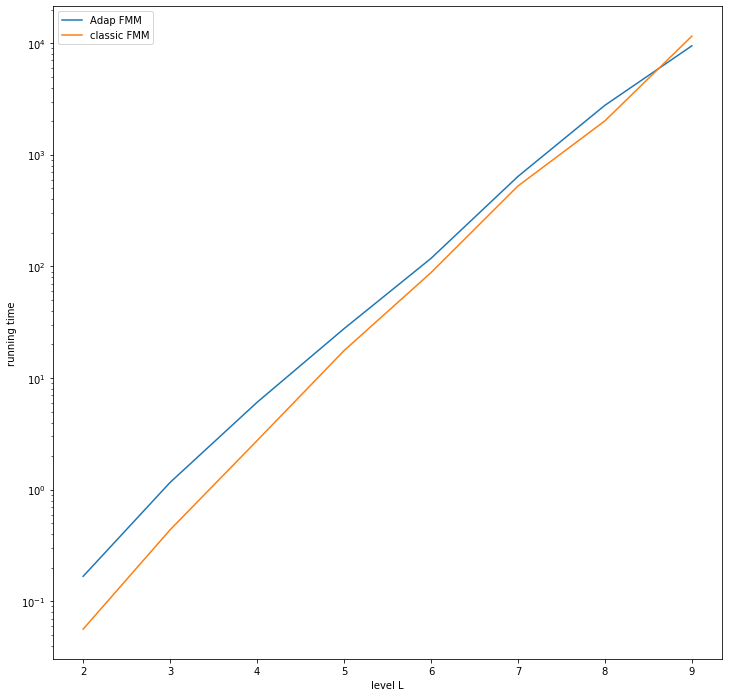

In [50]:
#print(FmmTimeList)
glist=[2,3,4,5,6,7,8,9]
fig = plt.figure(figsize=(12, 12))
plt.plot(glist, adaplist,label='Adap FMM')
plt.plot(glist,fmmlist,label='classic FMM')

plt.legend(loc="upper left")
plt.xlabel('level L')
plt.ylabel('running time')
plt.yscale('log')
#plt.xscale('log')
plt.show()